### This notebook focus on plotting the number of SVs which overlaps with 1000G

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Starting Spark application


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
# SG10K-SV Release1.4 overlap 1000G
df = pd.DataFrame({
    'SVTYPE': ["DEL", "DUP", "INS"],
    'SG10K-SV r1.4': [11560, 32465, 29011],
    '1000G-SV': [3105, 284, 6279]
})


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [3]:
## Colour code plan
## sg10ksv_palette = c(
#    "#D62628",    # SG-Chinese
#    "#9467BD",    # SG-Indian
#    "#2EA02B",    # SG-Malay
#    "#4DBBD5FF",  # DEL
#    "#DE8F44",    # INS
##    "#00A087FF"   # DUP
##)
onekg_color = ['#4DBBD5FF','#00A087FF', '#DE8F44']

sg10k_color = ['#97FFFF','#C1FFC1', '#FFEC8B']

# Control legend color
del_Gnomad_patch = mpatches.Patch(color= onekg_color[0] )
dup_Gnomad_patch = mpatches.Patch(color= onekg_color[1] )
ins_Gnomad_patch = mpatches.Patch(color= onekg_color[2] )

del_SG10K_patch = mpatches.Patch(color= sg10k_color[0] )
dup_SG10K_patch = mpatches.Patch(color= sg10k_color[1] )
ins_SG10K_patch = mpatches.Patch(color= sg10k_color[2] )

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
%%sh
pip install boto3

In [5]:
import boto3
import io
import matplotlib.pyplot as plt
import seaborn as sns

def save_fig_to_s3(fig, bucket, key):
    img_data = io.BytesIO()
    fig.savefig(img_data, format='svg', dpi=300)
    img_data.seek(0)

    s3 = boto3.client('s3')
    response = s3.put_object(Bucket=bucket, Key=key, Body=img_data, ContentType='image/svg')
    print(response)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
ax = plt.subplots(figsize=(10,10))
ax = plt.subplots()

# plotting columns
ax = sns.barplot(x=df["SVTYPE"], y=df["SG10K-SV r1.4"],  palette = sg10k_color , label="SG10K-SV r1.4" )
ax = sns.barplot(x=df["SVTYPE"], y=df["1000G-SV"],  palette = onekg_color , label= "1000G-SV")
 
# renaming the axes
ax.set(xlabel="SVTYPE", ylabel="Count")
# ax.set_title("SG10K-SV r1.3 overlap Gnomad-SV")


plt.legend(loc=0, \
           labels=['DEL (SG10K-SV)', 'DEL (1000G-SV)', 'DUP (SG10K-SV)', 'DUP (1000G-SV)',   'INS (SG10K-SV)', 'INS (1000G-SV)'] , \
           handles= [del_SG10K_patch, del_Gnomad_patch, dup_SG10K_patch, dup_Gnomad_patch, ins_SG10K_patch, ins_Gnomad_patch])

ax.grid(axis="y" , linewidth=0.4)
ax.set_axisbelow(True)

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

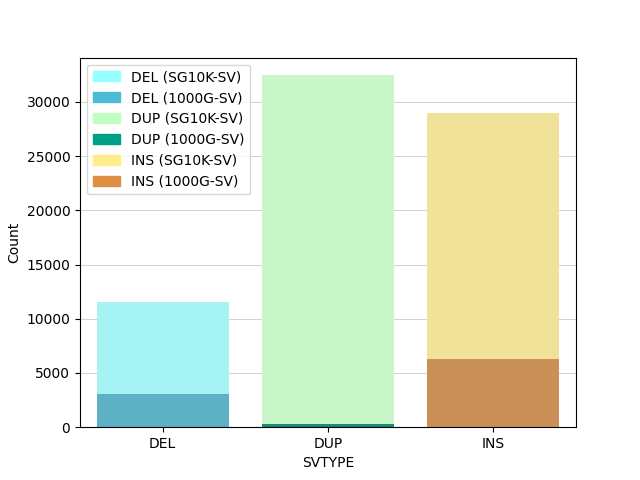

In [7]:
%matplot plt

In [8]:
save_fig_to_s3(plt, "Figures", "Figure1/Fig1D_Overlapwith1000G.svg")

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…